<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Supermercado_Previs%C3%A3o_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color='blue'>Previsão de Vendas em Supermercado para o próximo ano em determinada loja</font>

<strong> 1° Problema de Negócio </strong>


  Os cientistas de dados do SuperMercado DIA-A-DIA coletaram dados de vendas dos últimos 3 anos para 1559 produtos em 10 lojas em diferentes cidades.  

Além disso, foram determinados vários atributos de cada produto e loja para um  trabalho Ciência de Dados. 

O objetivo é criar um modelo de Machine Learning para prever as vendas de cada produto numa determinada loja para o próximo ano.

Por meio do resultado das previsões, o SuperMercado tentará entender as propriedades de produtos e lojas para estimar o aumento das vendas e,  consequentemente, do faturamento do Supermercado.





https://gist.github.com/regispires/acb4cb3112f611160fa0dc6c687feab7

https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/

<strong> 2° Onde estão os dados? </strong>

In [4]:
# Importação das Bibliotecas necessárias para o trabalho
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split


In [17]:
!apt-get -qq install -y pandas-profiling

E: Unable to locate package pandas-profiling


In [15]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<strong> 3° Análise Exploratória dos Dados </strong>

In [6]:
# Importando os dados de treino e teste
#train_data = pd.read_csv('train.csv')
#test_data = pd.read_csv('test.csv')
data=pd.read_csv('/content/Supermercado_Previsão_de_Vendas.csv')

In [10]:
# shape dos dados
#print('\nShape of training data :',train_data.shape)
#print('\nShape of testing data :',test_data.shape)
print('\nShape of data :', data.shape)
data.head()


Shape of data : (5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


###Conhecendo o Pandas Profiling

In [ ]:
#Esse banco de dados já foi feito todo o pré-processamento
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='Vendas do Supermercado DIA-A-DIA',html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file(output_file="Relatório- Base de Dados.html")

In [ ]:
# Pré-processamento dos dados - Amostra Treino e Teste

# Dados de Treino - Preparação para modelagem - Separação das  variáveis de entrada e variável de saida (target/label.....o que queremos prever...)
train_x = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = train_data['Item_Outlet_Sales']

# Dados de Teste - Preparação para modelagem - Separação das  variáveis de entrada e variável de saida (target/label.....o que queremos prever...)
test_x = test_data.drop(columns=['Item_Outlet_Sales'],axis=1)
test_y = test_data['Item_Outlet_Sales']

test_x = test_data.drop(columns=['Item_Outlet_Sales'],axis=1)
test_y = test_data['Item_Outlet_Sales']

<strong> 4° Machine Learning  </strong>

In [ ]:
# Modelagem

## Criação do Modelo - Linear Regression 
model_L = LinearRegression()

# obs: Você pode adicionar parâmetros e testar para ver se melhora o resultado da sua predição
# Como por exemplo os parâmetros "fit_intercept" e "normalize"
# Documentação do sklearn LinearRegression: 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Treino do modelo - Dados de Treino 
model_L.fit(train_x,train_y)

# Coeficientes do modelo Treinado 
print('\nCoefficient of model :', model_L.coef_)

# intercepto do Modelo
print('\nIntercept of model',model_L.intercept_)




Coefficient of model : [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]

Intercept of model -121926.97473298332


In [ ]:
# Fazendo Previsões com os dados de treino 
predict_train = model_L.predict(train_x)
print('\nItem_Outlet_Sales on training data',predict_train) 




Item_Outlet_Sales on training data [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]


In [ ]:
# Calculando o RMSE Root Mean Squared Error - nos dados de treino
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)




RMSE on train dataset :  1135.8159344155245


In [ ]:
# # Fazendo Previsões com os dados de teste
predict_test = model_L.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test) 



In [ ]:
# Calculando o RMSE Root Mean Squared Error - nos dados de teste
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  1009.2517232209692


In [ ]:
# Criando o Modelo Mais Top Top - RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=5)

# Treinando o modelo - Dados de Treino
model_RFR.fit(train_x, train_y)

# Fazendo previsões com os dados de treino e teste
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Calculando o RMSE Root Mean Squared Error 
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))


RMSE on train data:  1022.7184299222604
RMSE on test data:  960.3233678369706


<strong> 5° Fazendo as Previsões </strong>

In [ ]:
# Fazendo novas previsões predict the target on the testing dataset
predict_test = model_RFR.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test) 


In [18]:
data.drop(labels='Item_Identifier', axis=1, inplace=True)

In [19]:
data.isna().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                4075 non-null   object 
 8   Outlet_Location_Type       5681 non-null   object 
 9   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 444.0+ KB


In [23]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


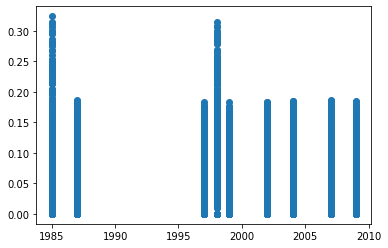

In [25]:
import matplotlib.pyplot as plt
plt.scatter(data['Outlet_Establishment_Year'], data['Item_Visibility']);

In [27]:
data['Outlet_Establishment_Year'] = data['Outlet_Establishment_Year'].astype("category")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                4705 non-null   float64 
 1   Item_Fat_Content           5681 non-null   object  
 2   Item_Visibility            5681 non-null   float64 
 3   Item_Type                  5681 non-null   object  
 4   Item_MRP                   5681 non-null   float64 
 5   Outlet_Identifier          5681 non-null   object  
 6   Outlet_Establishment_Year  5681 non-null   category
 7   Outlet_Size                4075 non-null   object  
 8   Outlet_Location_Type       5681 non-null   object  
 9   Outlet_Type                5681 non-null   object  
dtypes: category(1), float64(3), object(6)
memory usage: 405.5+ KB


In [30]:
categories = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Establishment_Year',
              'Outlet_Location_Type', 'Outlet_Type']
values = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
target = 'Item_Outlet_Sales'
for column in categories:
    print(data[column].value_counts(), end='\n\n')

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

1985    976
1987    621
1997    620
1999    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establish

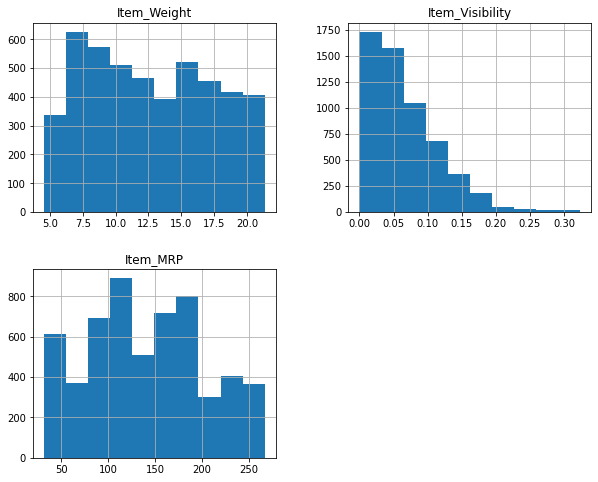

In [31]:
data[values].hist(figsize=(10,8));

In [32]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP
Item_Weight,1.000000,-0.019089,0.049809
Item_Visibility,-0.019089,1.000000,-0.014013
Item_MRP,0.049809,-0.014013,1.000000


In [35]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna("Unknown", inplace=True)

In [36]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data[values] = scaler.fit_transform(data[values])

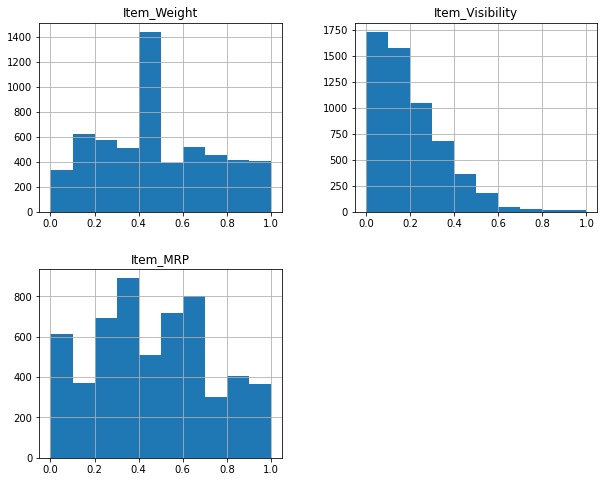

In [37]:
data[values].hist(figsize=(10,8));

In [39]:
#Tratando dados categóricos
data = pd.get_dummies(data, drop_first=True)

In [40]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.964275,0.023374,0.323413,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0.222983,0.118737,0.235849,0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,1,0,0
2,0.598095,0.307674,0.894140,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0.164335,0.047548,0.524488,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
4,0.484706,0.366458,0.862069,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
X = data.drop(labels=target, axis=1)
y = data[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

#Medindo o desempenho
from sklearn.metrics import mean_squared_error

import numpy as np
print("RMSE treino:", np.sqrt(mean_squared_error(y_train, clf.predict(X_train))))
print("RMSE teste:", np.sqrt(mean_squared_error(y_test, y_predict)))

clf.intercept_, clf.coef_